In [1]:
pip install pandas matplotlib seaborn


     ---------------------------------------- 0.0/165.9 kB ? eta -:--:--
     ------- -------------------------------- 30.7/165.9 kB ? eta -:--:--
     --------- --------------------------- 41.0/165.9 kB 487.6 kB/s eta 0:00:01
     -------------------- ---------------- 92.2/165.9 kB 655.4 kB/s eta 0:00:01
     -------------------------- --------- 122.9/165.9 kB 654.9 kB/s eta 0:00:01
     -----------------------------------  163.8/165.9 kB 701.4 kB/s eta 0:00:01
     ------------------------------------ 165.9/165.9 kB 622.7 kB/s eta 0:00:00
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/8.0 MB ? eta -:--:--
    --------------------------------------- 0.2/8.0 MB 1.1 MB/s eta 0:00:07
   - -------------------------------------- 0.2/8.0 MB 1.4 MB/s eta 0:00:06
   - -------------------------------------- 0.2/8.0 MB 1.4 MB/s eta 0:00:06
   - -------------

In [2]:
import pandas as pd

# Load the data
df = pd.read_csv('instagram-competitors.csv')

# Display the first few rows of the dataset
print(df.head())


   Favorite                                              Image  \
0     False  https://scontent-lhr8-1.xx.fbcdn.net/v/t51.288...   
1     False  https://scontent-lhr6-2.xx.fbcdn.net/v/t51.288...   
2     False  https://scontent-lhr6-2.xx.fbcdn.net/v/t51.288...   

               Name        ScreenName  Followers  Posts  Reels   Likes  \
0             Udemy            @udemy  3190542.0     19      7  778.96   
1  General Assembly  @generalassembly   178527.0     16      7  170.96   
2    Moringa School    @moringaschool        NaN     26     11   55.00   

   Comments  Engagement  
0     81.31        0.27  
1     49.39        1.23  
2      0.70         NaN  


In [3]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values (or handle them accordingly)
df.dropna(inplace=True)


Favorite      0
Image         0
Name          0
ScreenName    0
Followers     1
Posts         0
Reels         0
Likes         0
Comments      0
Engagement    1
dtype: int64


In [4]:
# Summary statistics
print(df.describe())

# Top 5 pages by followers
top_followers = df.nlargest(5, 'Followers')
print(top_followers)

# Top 5 pages by engagement
top_engagement = df.nlargest(5, 'Engagement')
print(top_engagement)

# Average engagement rate
avg_engagement_rate = df['Engagement'].mean()
print(f'Average Engagement Rate: {avg_engagement_rate:.2f}')


          Followers     Posts  Reels       Likes   Comments  Engagement
count  2.000000e+00   2.00000    2.0    2.000000   2.000000    2.000000
mean   1.684534e+06  17.50000    7.0  474.960000  65.350000    0.750000
std    2.129816e+06   2.12132    0.0  429.920923  22.570848    0.678823
min    1.785270e+05  16.00000    7.0  170.960000  49.390000    0.270000
25%    9.315308e+05  16.75000    7.0  322.960000  57.370000    0.510000
50%    1.684534e+06  17.50000    7.0  474.960000  65.350000    0.750000
75%    2.437538e+06  18.25000    7.0  626.960000  73.330000    0.990000
max    3.190542e+06  19.00000    7.0  778.960000  81.310000    1.230000
   Favorite                                              Image  \
0     False  https://scontent-lhr8-1.xx.fbcdn.net/v/t51.288...   
1     False  https://scontent-lhr6-2.xx.fbcdn.net/v/t51.288...   

               Name        ScreenName  Followers  Posts  Reels   Likes  \
0             Udemy            @udemy  3190542.0     19      7  778.96   
1  Ge

Matplotlib is building the font cache; this may take a moment.


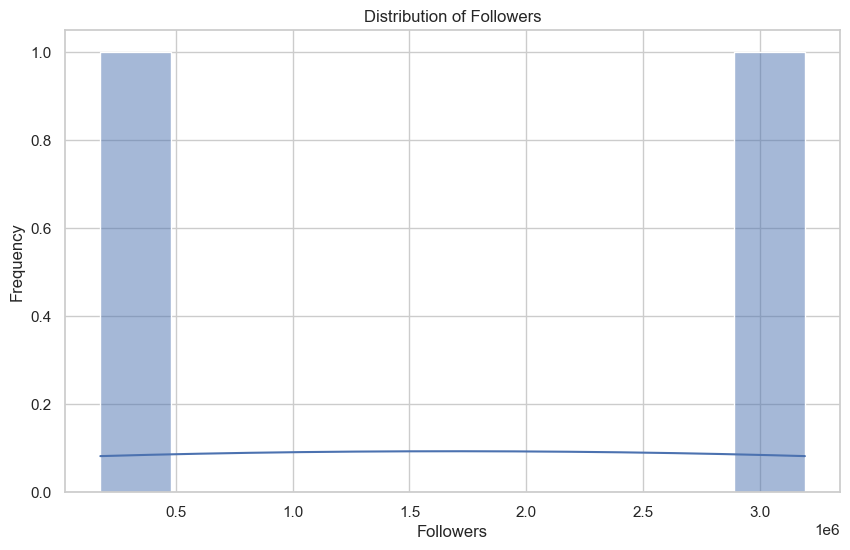

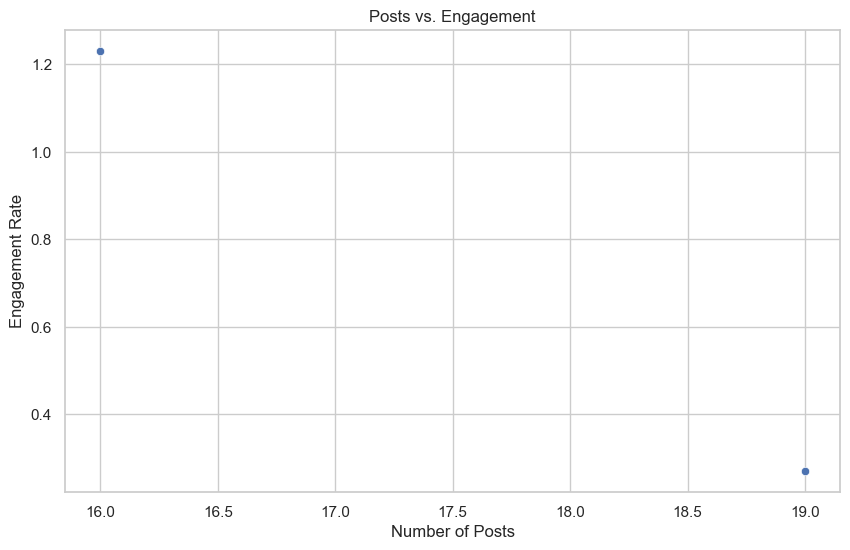

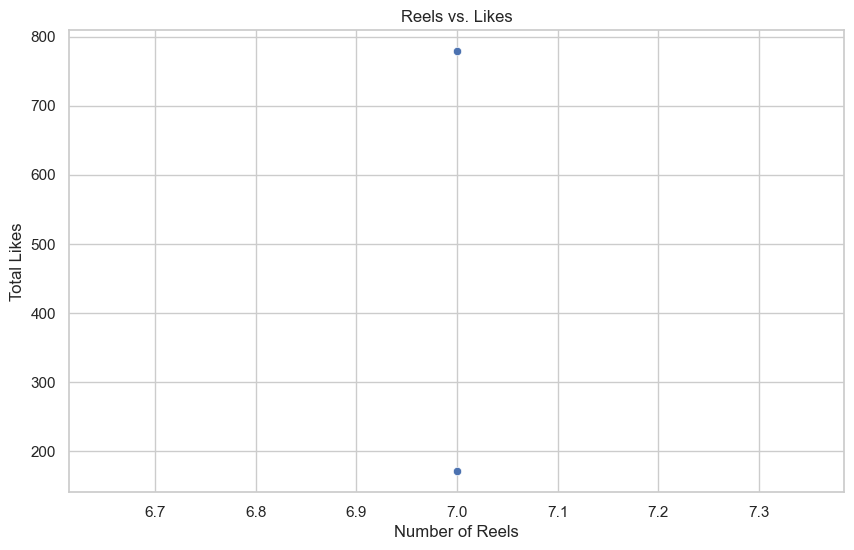

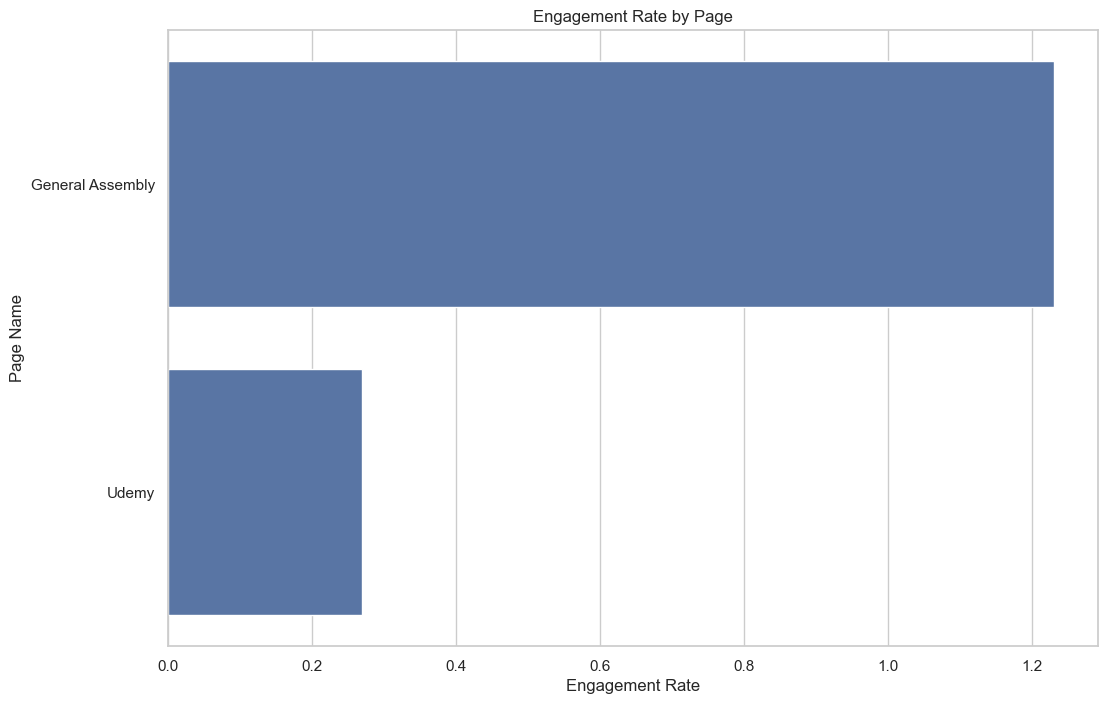

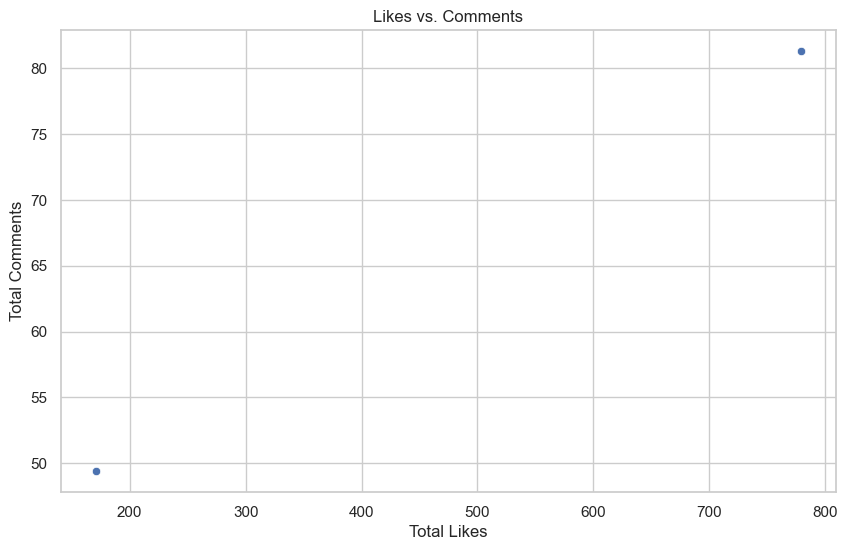

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Followers distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Followers'], bins=10, kde=True)
plt.title('Distribution of Followers')
plt.xlabel('Followers')
plt.ylabel('Frequency')
plt.show()

# Posts vs. Engagement
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Posts', y='Engagement', data=df)
plt.title('Posts vs. Engagement')
plt.xlabel('Number of Posts')
plt.ylabel('Engagement Rate')
plt.show()

# Reels vs. Likes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Reels', y='Likes', data=df)
plt.title('Reels vs. Likes')
plt.xlabel('Number of Reels')
plt.ylabel('Total Likes')
plt.show()

# Engagement rate by page
plt.figure(figsize=(12, 8))
sns.barplot(x='Engagement', y='Name', data=df.sort_values(by='Engagement', ascending=False))
plt.title('Engagement Rate by Page')
plt.xlabel('Engagement Rate')
plt.ylabel('Page Name')
plt.show()

# Likes vs. Comments
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Likes', y='Comments', data=df)
plt.title('Likes vs. Comments')
plt.xlabel('Total Likes')
plt.ylabel('Total Comments')
plt.show()


In [8]:
# Calculate average engagement rate by content type
avg_engagement_posts = df['Engagement'][df['Posts'] > 0].mean()
avg_engagement_reels = df['Engagement'][df['Reels'] > 0].mean()


print(f"Average Engagement Rate (Posts): {avg_engagement_posts:.2f}")
print(f"Average Engagement Rate (Reels): {avg_engagement_reels:.2f}")



Average Engagement Rate (Posts): 0.75
Average Engagement Rate (Reels): 0.75
